The purpose of this notebook is to demonstrate how to refine with locally defined GSAS-II functions.



# Imports

In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import sys

sys.path += ["../../../easyXRD"]


import easyxrd
from easyxrd.core import exrd

import xarray as xr
import numpy as np
import pybaselines
from copy import deepcopy

In [11]:
# importing matplotlib for plots.
%matplotlib widget
import matplotlib.pyplot as plt

plt.rcParams.update({"figure.max_open_warning": 0})
plt.rcParams["figure.constrained_layout.use"] = True

In [12]:
%%time


# import pyFAI,fabio
# ai_file = 'tiff_files/_calibration.poni'
# mask_file = 'tiff_files/_mask.edf'
# ai = pyFAI.load(ai_file)
# mask = fabio.open(mask_file).data

sample_Kapton = exrd()
# sample_Kapton.load_xrd_data(from_tiff_file='tiff_files/Kapton.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,10.2),
#                             plot=True
#                             )
# sample_Kapton.export_ds(save_dir='nc_files',save_name='Kapton.nc')
sample_Kapton.load_xrd_data(from_nc_file="nc_files/Kapton.nc", plot=False)

sample_Air = exrd()
# sample_Air.load_xrd_data(from_tiff_file='tiff_files/Air_scattering.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,10.2),
#                             plot=True
#                             )
# sample_Air.export_ds(save_dir='nc_files',save_name='Air.nc')
sample_Air.load_xrd_data(from_nc_file="nc_files/Air.nc", plot=False)

sample_LaB6 = exrd()
# sample_LaB6.load_xrd_data(from_tiff_file='tiff_files/NIST-LaB6.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,10.2),
#                             plot=True
#                             )
# sample_LaB6.export_ds(save_dir='nc_files',save_name='NIST-LaB6.nc')
sample_LaB6.load_xrd_data(from_nc_file="nc_files/NIST-LaB6.nc", plot=False)

sample_CeO2 = exrd()
# sample_CeO2.load_xrd_data(from_tiff_file='tiff_files/NIST-CeO2.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,10.2),
#                             plot=True
#                             )
# sample_CeO2.export_ds(save_dir='nc_files',save_name='NIST-CeO2.nc')
sample_CeO2.load_xrd_data(from_nc_file="nc_files/NIST-CeO2.nc", plot=False)

sample_mix = exrd()
# sample_mix.load_xrd_data(from_tiff_file='tiff_files/NIST-LaB6-CeO2-mix.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,10.2),
#                             plot=True
#                             )
# sample_mix.export_ds(save_dir='nc_files',save_name='NIST-LaB6-CeO2-mix.nc')
sample_mix.load_xrd_data(from_nc_file="nc_files/NIST-LaB6-CeO2-mix.nc", plot=False)

phases_LaB6 = [
    {
        "mp_id": "none",
        "cif": "_cifs/LaB6_a=4.1568_NIST_value.cif",
        "label": "LaB6",
        "scale": 1.0025,
        "scale_a": 1,
        "scale_b": 1,
        "scale_c": 1,
    },
]

phases_CeO2 = [
    {
        "mp_id": "none",
        "cif": "_cifs/CeO2_a=5.4113_NIST_value.cif",
        "label": "CeO2",
        "scale": 1.0025,
        "scale_a": 1,
        "scale_b": 1,
        "scale_c": 1,
    },
]

phases_mix = [
    {
        "mp_id": "none",
        "cif": "_cifs/LaB6_a=4.1568_NIST_value.cif",
        "label": "LaB6",
        "scale": 1.0025,
        "scale_a": 1,
        "scale_b": 1,
        "scale_c": 1,
    },
    {
        "mp_id": "none",
        "cif": "_cifs/CeO2_a=5.4113_NIST_value.cif",
        "label": "CeO2",
        "scale": 1.0025,
        "scale_a": 1,
        "scale_b": 1,
        "scale_c": 1,
    },
]

CPU times: user 86.9 ms, sys: 3.03 ms, total: 90 ms
Wall time: 89 ms



Rwp from 1st refinement is = 52.051 
 
Cell parameters of all phases are refined. Rwp is now 7.728 (was 52.051)
Strain broadening of all phases are refined. Rwp is now 6.156 (was 7.728)
Size broadening of all phases are refined. Rwp is now 6.040 (was 6.156)
Background is refined. Rwp is now 5.903 (was 6.040)
After setting LeBail refinement to False, Rwp is now 6.507 (was 5.903)
Phase fractions of all phases are refined. Rwp is now 6.507 (was 6.507)
Preferred orientation for LaB6 phase is refined. Rwp is now 6.465 (was 6.507)
Background is refined. Rwp is now 6.401 (was 6.465)


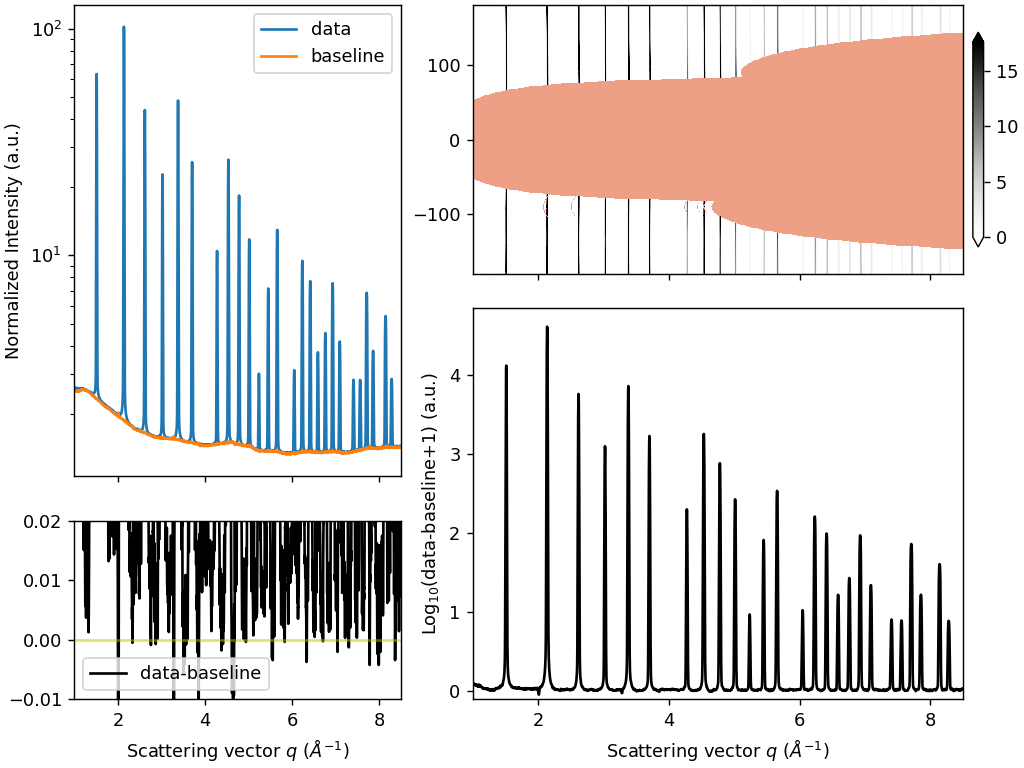

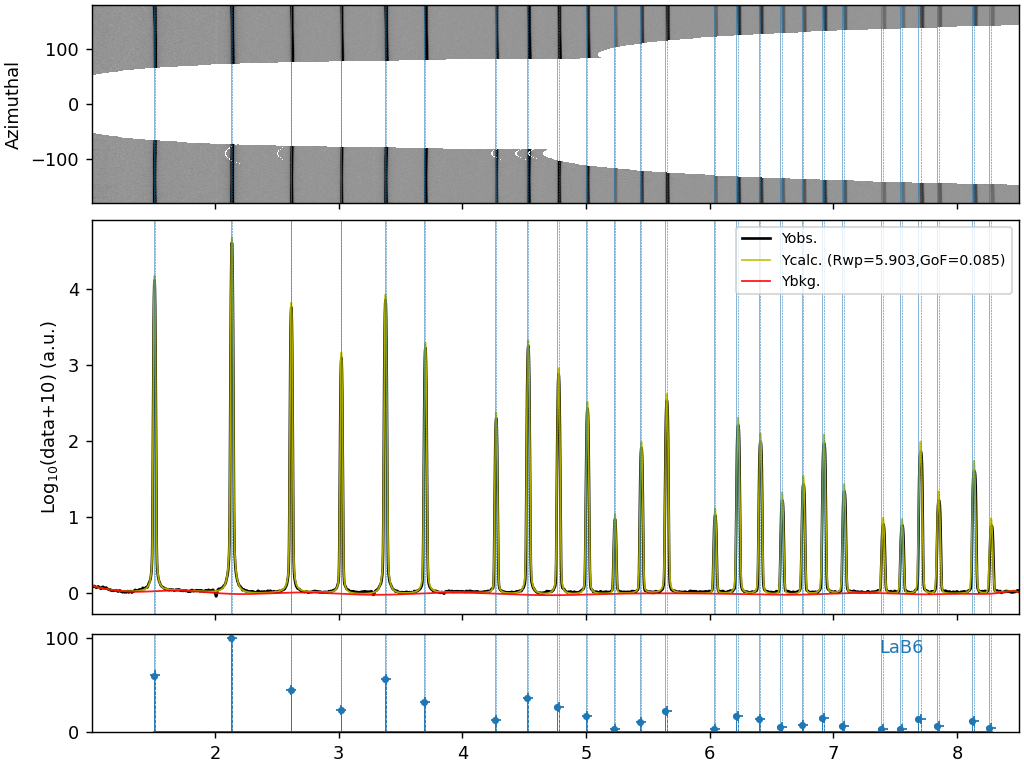

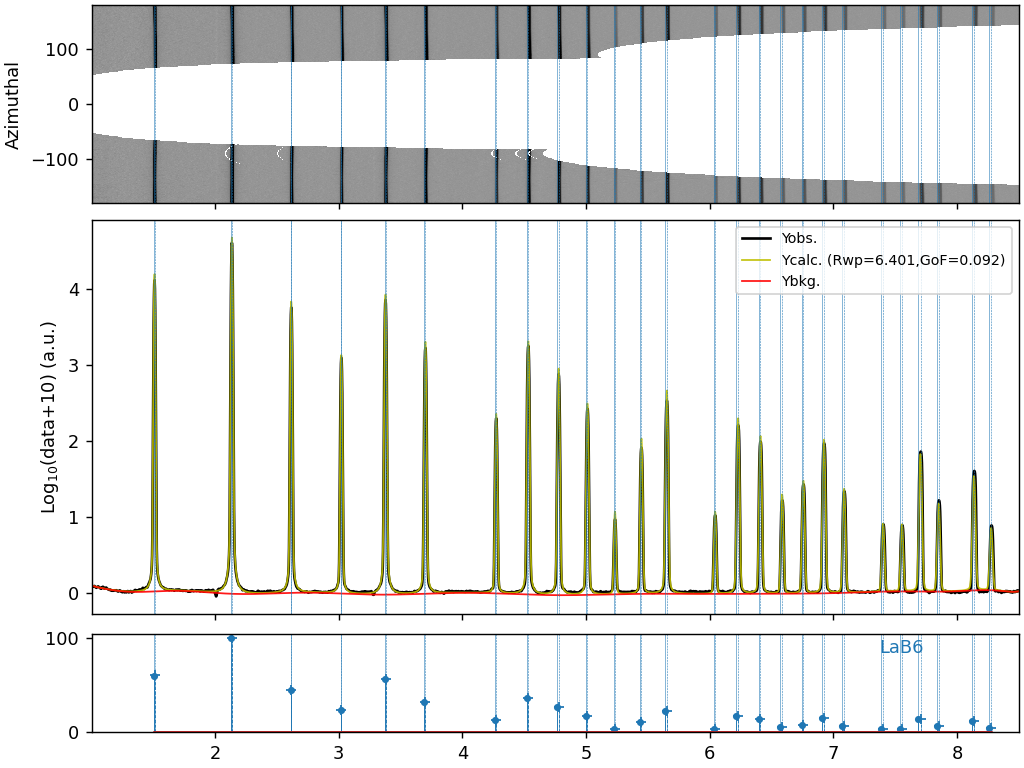

In [13]:
sample = deepcopy(sample_LaB6)


sample.get_baseline(
    input_bkg=sample_Kapton.ds.i1d,
    arpls_lam=1e6,
    use_arpls=True,
    roi_radial_range=[1.0, 8.5],
    normalize_to=100,
    spotty_data_correction=False,
    spotty_data_correction_threshold=2,
    plot=True,
)
sample.load_phases(phases=phases_LaB6, plot=False)

sample.setup_gsas2_calculator(instprm_from_gpx="gsas_instprms.gpx")
sample.refine_cell_params()
sample.refine_strain_broadening()
sample.refine_size_broadening()
sample.refine_background(num_coeffs=20)
sample.plot_refinement()

sample.set_LeBail(set_to=False, refine=True)
sample.refine_phase_fractions()
sample.refine_preferred_orientation(phase=0, harmonics_order=4)
sample.refine_background(num_coeffs=20)
sample.plot_refinement(ylogscale=True)

/users/software/miniforge3/envs/menv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/users/software/miniforge3/envs/menv/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)



Rwp from 1st refinement is = 46.990 
 
Cell parameters of all phases are refined. Rwp is now 7.989 (was 46.990)
Strain broadening of all phases are refined. Rwp is now 5.911 (was 7.989)
Size broadening of all phases are refined. Rwp is now 5.801 (was 5.911)
Background is refined. Rwp is now 5.726 (was 5.801)
After setting LeBail refinement to False, Rwp is now 7.148 (was 5.726)
Phase fractions of all phases are refined. Rwp is now 7.148 (was 7.148)
Preferred orientation for CeO2 phase is refined. Rwp is now 7.143 (was 7.148)
Background is refined. Rwp is now 6.978 (was 7.143)


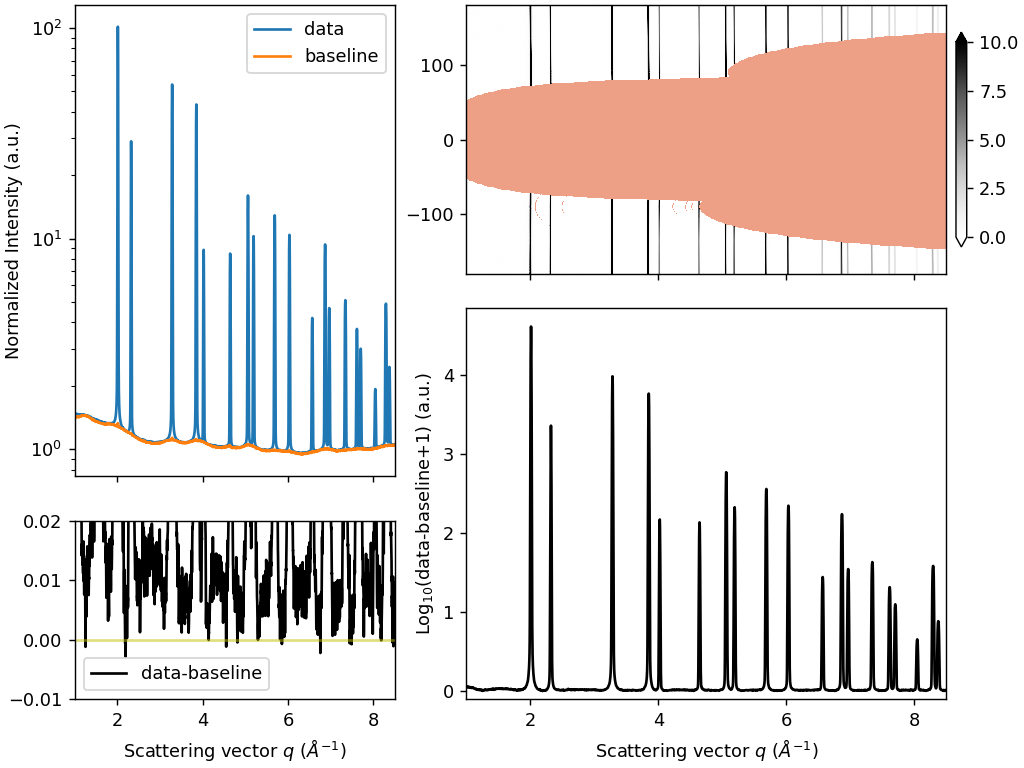

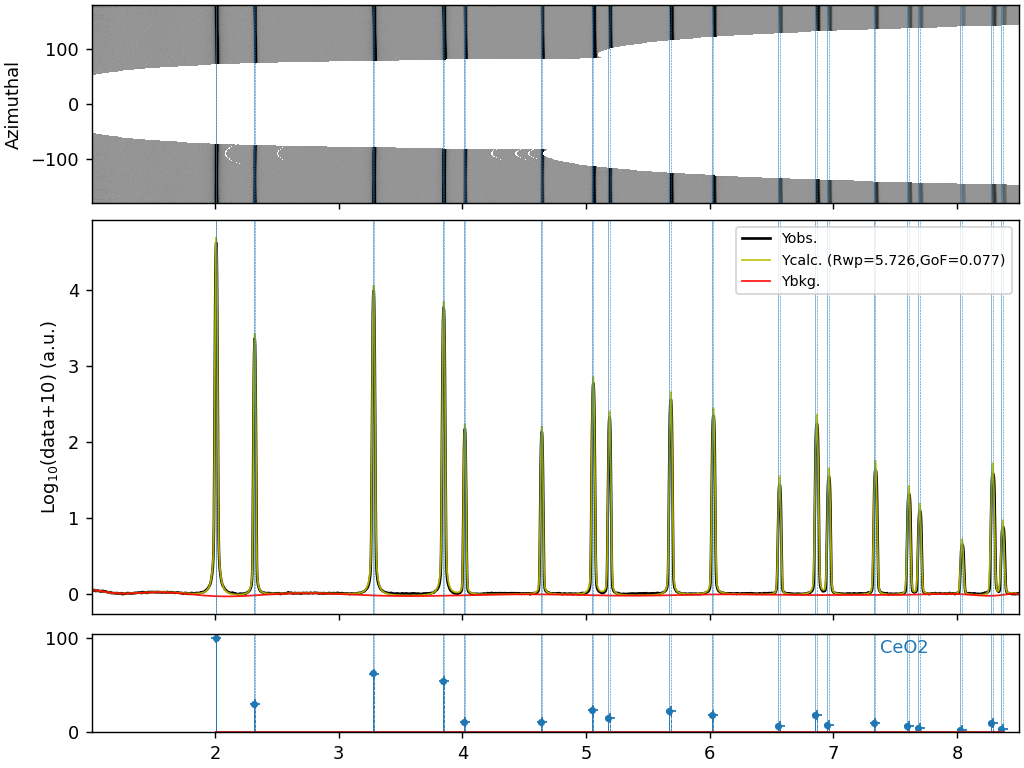

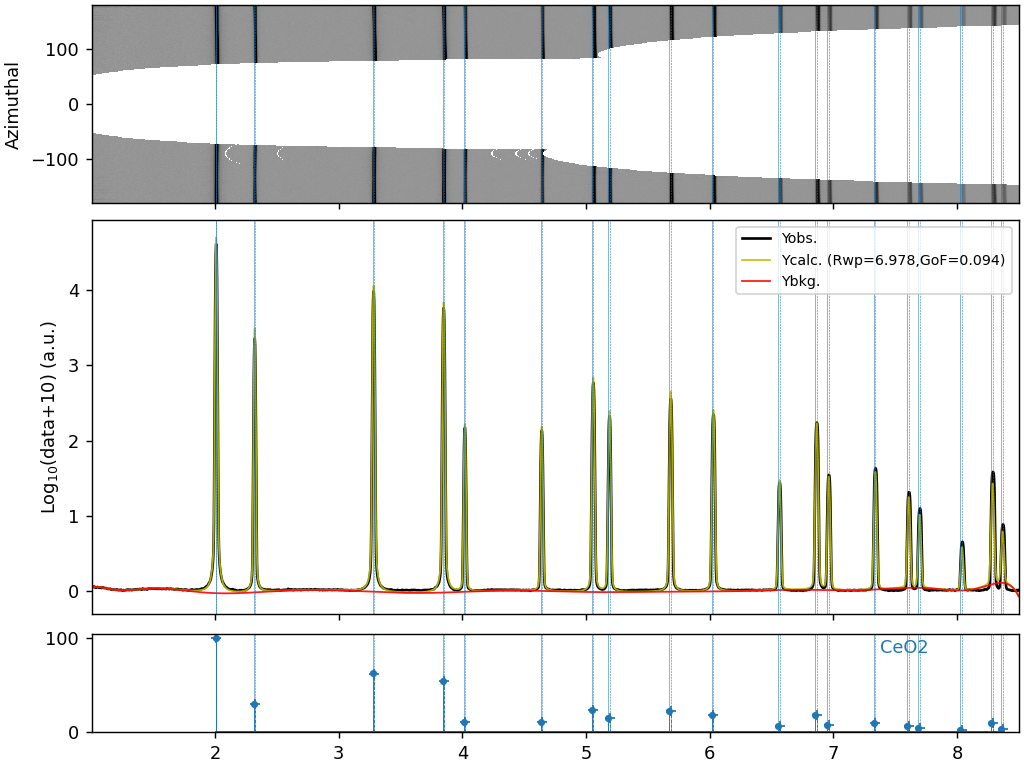

In [14]:
sample = deepcopy(sample_CeO2)


sample.get_baseline(
    input_bkg=sample_Kapton.ds.i1d,
    arpls_lam=1e6,
    use_arpls=True,
    roi_radial_range=[1.0, 8.5],
    normalize_to=100,
    spotty_data_correction=False,
    spotty_data_correction_threshold=2,
    plot=True,
)
sample.load_phases(phases=phases_CeO2, plot=False)

sample.setup_gsas2_calculator(instprm_from_gpx="gsas_instprms.gpx")
sample.refine_cell_params()
sample.refine_strain_broadening()
sample.refine_size_broadening()
sample.refine_background(num_coeffs=20)
sample.plot_refinement()

sample.set_LeBail(set_to=False, refine=True)
sample.refine_phase_fractions()
sample.refine_preferred_orientation(phase=0, harmonics_order=4)
sample.refine_background(num_coeffs=20)
sample.plot_refinement(ylogscale=True)


Rwp from 1st refinement is = 52.641 
 
Cell parameters of all phases are refined. Rwp is now 5.318 (was 52.641)
Strain broadening of all phases are refined. Rwp is now 5.260 (was 5.318)
Size broadening of all phases are refined. Rwp is now 5.281 (was 5.260)
Background is refined. Rwp is now 4.976 (was 5.281)
After setting LeBail refinement to False, Rwp is now 9.789 (was 4.976)
Phase fractions of all phases are refined. Rwp is now 6.364 (was 9.789)
Preferred orientation for LaB6 phase is refined. Rwp is now 6.349 (was 6.364)
Background is refined. Rwp is now 6.241 (was 6.349)


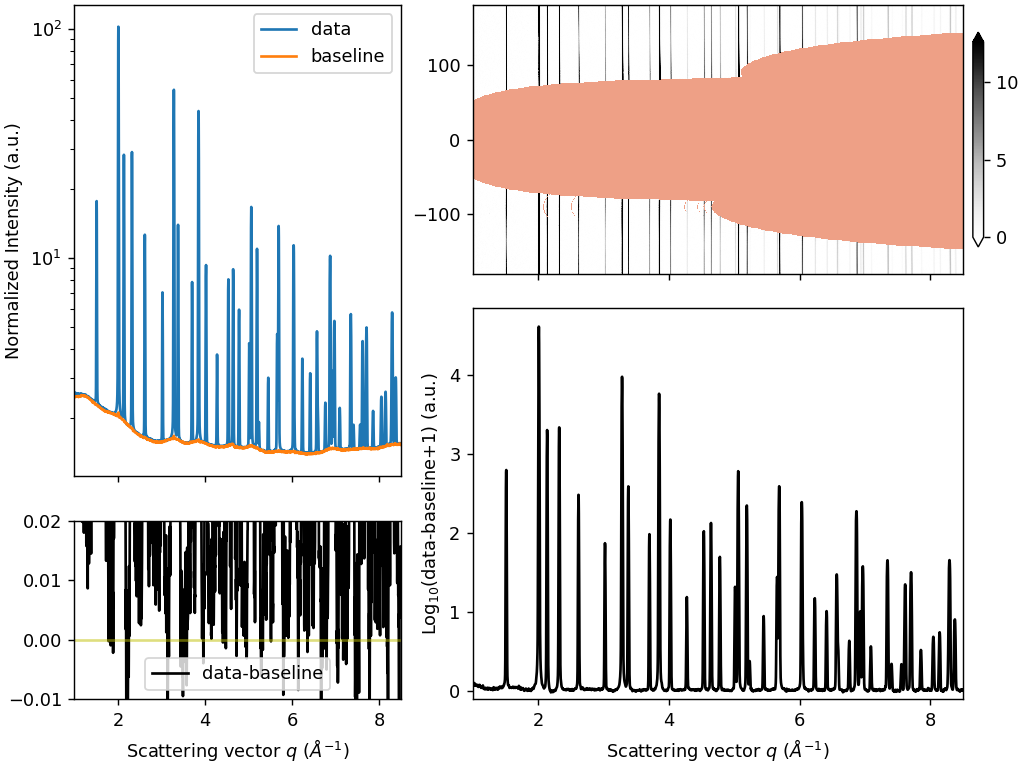

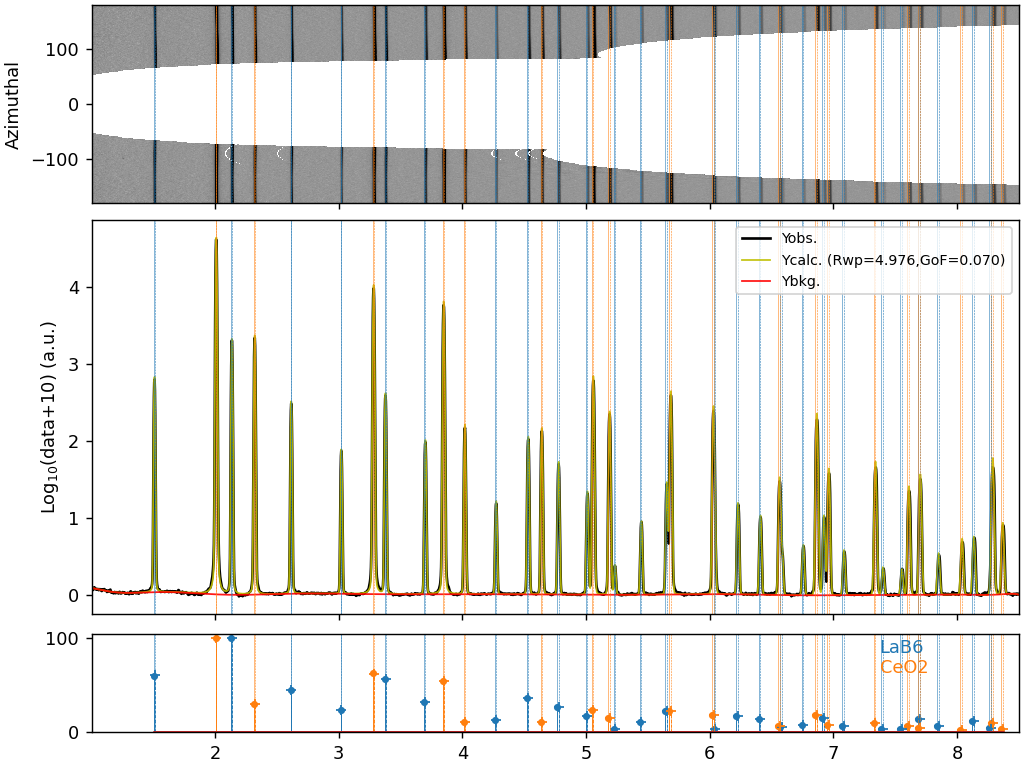

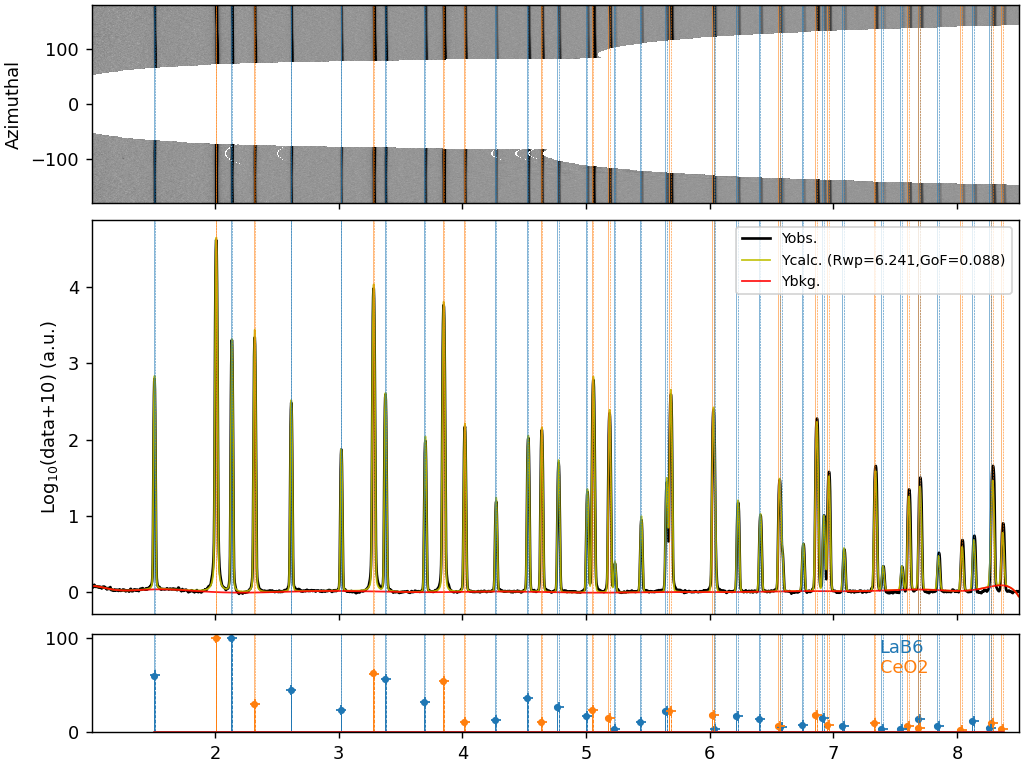

In [15]:
sample = deepcopy(sample_mix)


sample.get_baseline(
    input_bkg=sample_Kapton.ds.i1d,
    arpls_lam=1e6,
    use_arpls=True,
    roi_radial_range=[1.0, 8.5],
    normalize_to=100,
    spotty_data_correction=False,
    spotty_data_correction_threshold=2,
    plot=True,
)
sample.load_phases(phases=phases_mix, plot=False)

sample.setup_gsas2_calculator(instprm_from_gpx="gsas_instprms.gpx")
sample.refine_cell_params()
sample.refine_strain_broadening()
sample.refine_size_broadening()
sample.refine_background(num_coeffs=20)
sample.plot_refinement()

sample.set_LeBail(set_to=False, refine=True)
sample.refine_phase_fractions()
sample.refine_preferred_orientation(phase=0, harmonics_order=4)
sample.refine_background(num_coeffs=20)
sample.plot_refinement(ylogscale=True)